# ActBlue analysis

In [1]:
import json
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import psycopg2
import requests

/Users/chriszs/.local/share/virtualenvs/actblue-analysis-AfcA3U3w/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
%matplotlib inline

plt.style.use('ggplot')

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
def read_or_save(name, func):
    path = 'pickles/' + name + '.pickle.gz'
    if (os.path.isfile(path)):
        return pd.read_pickle(path)
    else:
        result = func()
        os.makedirs('pickles', exist_ok=True)
        result.to_pickle(path)
        return result

In [4]:
committee_id = "C00401224"
year_since = 2013

In [5]:
with open("config.json") as f:
    conf = json.load(f)
conn = psycopg2.connect(
    dbname=conf['dbname'],
    user=conf['user'],
    host=conf['host'],
    password=conf['password']
)
conn.autocommit = True

### How many reports are in the database?

In [6]:
filings_count = read_or_save(
    'filings_count',
    lambda: pd.read_sql("""
    SELECT count(*)
    FROM fec_filings;
    """, con=conn)
)
filings_count

,count
0,363169


### Which ActBlue reports do we have?

In [7]:
actblue_summaries = read_or_save(
    'actblue_summaries',
    lambda: pd.read_sql("""
    SELECT *
    FROM fec_pac_summaries
    JOIN fec_amended_filings USING (filing_id)
    WHERE filer_committee_id_number = '""" + committee_id + """'
    AND extract(year from coverage_through_date) >= """ + str(year_since) + """
    ORDER BY coverage_through_date DESC;
    """, con=conn, parse_dates={
        'coverage_from_date': '%Y-%m-%d',
        'coverage_through_date': '%Y-%m-%d'
    })
)

actblue_summaries[[
    'filing_id',
    'form_type',
    'committee_name',
    'coverage_from_date',
    'coverage_through_date',
    'report_code',
    'col_a_total_contributions'
]]

,filing_id,form_type,committee_name,coverage_from_date,coverage_through_date,report_code,col_a_total_contributions
0,1258193,F3XN,ActBlue,2018-07-01,2018-07-31,M8,"60,945,546.97"
1,1251343,F3XN,ActBlue,2018-06-01,2018-06-30,M7,"63,088,119.19"
2,1240253,F3XN,ActBlue,2018-05-01,2018-05-31,M6,"43,130,233.11"
3,1233520,F3XN,ActBlue,2018-04-01,2018-04-30,M5,"38,328,646.45"
4,1225971,F3XN,ActBlue,2018-03-01,2018-03-31,M4,"57,825,086.02"
5,1215697,F3XN,ActBlue,2018-02-01,2018-02-28,M3,"41,932,847.30"
6,1224404,F3XA,ActBlue,2018-01-01,2018-01-31,M2,"32,937,704.67"
7,1224416,F3XA,ActBlue,2017-12-01,2017-12-31,YE,"51,181,861.72"
8,1219434,F3XA,ActBlue,2017-11-01,2017-11-30,M12,"36,180,318.82"
9,1219420,F3XA,ActBlue,2017-10-01,2017-10-31,M11,"29,341,844.16"


### Are there any reports that FEC.gov has that we don't or vice versa?

In [8]:
def get_reports(committee_id):
    base = "https://api.open.fec.gov/v1/"
    url = base + "committee/" + committee_id + "/reports/?api_key=" + conf['fec_key'] + "&is_amended=False&per_page=100"

    return pd.DataFrame(requests.get(url).json()['results'])

actblue_api_summaries = read_or_save('actblue_api_summaries', lambda: get_reports(committee_id))
pd.to_numeric(actblue_api_summaries['calendar_ytd'])
actblue_api_summaries = actblue_api_summaries[actblue_api_summaries['calendar_ytd'] >= year_since]
actblue_api_summaries[['file_number','calendar_ytd']]

pd.DataFrame(pd.concat([actblue_api_summaries['file_number'],
                        actblue_summaries['filing_id']]).drop_duplicates(keep=False))

,0


### How many contributions are we analyzing?

In [9]:
actblue_contribs_count = read_or_save(
    'actblue_contribs_count',
    lambda: pd.read_sql("""
    -- DROP MATERIALIZED VIEW actblue_contribs;

    CREATE MATERIALIZED VIEW IF NOT EXISTS actblue_contribs AS
    SELECT contribs.*,
           fec_expenditures.election_code,
           beneficiary_committee_fec_id,
           beneficiary_candidate_fec_id,
           beneficiary_candidate_state,
           beneficiary_candidate_office,
           coalesce(cands.cand_id,cand_comms.cand_id) AS cand_id,
           coalesce(cands.cand_pty_affiliation,cand_comms.cand_pty_affiliation) AS cand_pty_affiliation,
           coalesce(cands.cand_office_st,cand_comms.cand_office_st) AS cand_office_st,
           coalesce(cands.cand_office,cand_comms.cand_office) AS cand_office,
           coalesce(cands.cand_pcc,cand_comms.cand_pcc) AS cand_pcc
    FROM
      (SELECT fec_contributions.filing_id,
              transaction_id,
              contributor_last_name,
              contributor_first_name,
              contributor_street_1,
              contributor_city,
              contributor_state,
              contributor_zip_code,
              contribution_date,
              contribution_amount,
              contributor_employer,
              contributor_occupation,
              memo_text_description
       FROM fec_contributions
       WHERE filing_id IN
           (SELECT filing_id
            FROM fec_pac_summaries
            JOIN fec_amended_filings USING (filing_id)
            WHERE filer_committee_id_number = 'C00401224'
              AND extract(YEAR
                          FROM coverage_through_date) >= 2013
            ORDER BY coverage_through_date DESC)
         AND form_type = 'SA11AI') AS contribs
    LEFT JOIN fec_expenditures ON fec_expenditures.filing_id IN
      (SELECT filing_id
       FROM fec_pac_summaries
       JOIN fec_amended_filings USING (filing_id)
       WHERE filer_committee_id_number = 'C00401224'
         AND extract(YEAR
                     FROM coverage_through_date) >= 2013
       ORDER BY coverage_through_date DESC)
    AND fec_expenditures.form_type = 'SB23'
    AND 'SB23_' || replace(transaction_id,'SA11AI_','') = transaction_id_number
    LEFT JOIN
      (SELECT DISTINCT ON (cand_id) cand_id,
                          cand_pcc,
                          cand_pty_affiliation,
                          cand_office_st,
                          cand_office
       FROM fec_candidates
       ORDER BY cand_id,
                cand_election_yr::int DESC) AS cands ON cands.cand_id = beneficiary_candidate_fec_id
    LEFT JOIN
      (SELECT DISTINCT ON (cand_pcc) cand_id,
                          cand_pcc,
                          cand_pty_affiliation,
                          cand_office_st,
                          cand_office
       FROM fec_candidates
       ORDER BY cand_pcc,
                cand_election_yr::int DESC) AS cand_comms ON cand_comms.cand_pcc = beneficiary_committee_fec_id; -- CREATE INDEX ON actblue_contribs ()

    GRANT ALL ON TABLE actblue_contribs TO redash_default;
    GRANT ALL ON TABLE actblue_contribs TO politics;

    ANALYZE actblue_contribs;

    SELECT count(*)
    FROM actblue_contribs;
    """, con=conn)
)
actblue_contribs_count

,count
0,73813481


### How have total contributions to ActBlue changed over reporting periods?

Text(0.5,1,'Total contributions by reporting period')

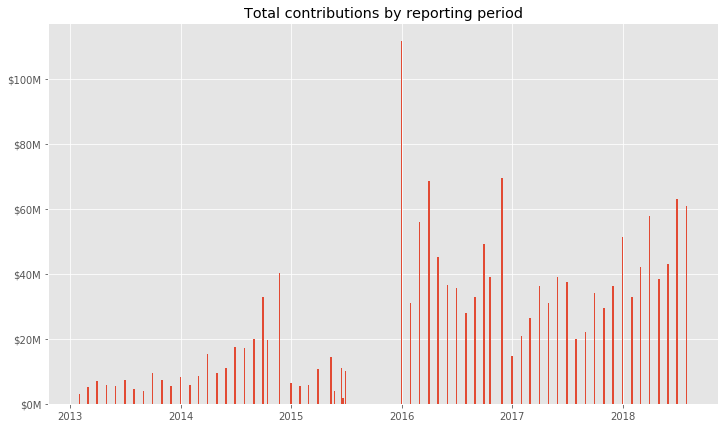

In [10]:
contribs_over_time = actblue_summaries[['coverage_through_date','col_a_total_contributions']]

# https://scentellegher.github.io/programming/2017/05/24/pandas-bar-plot-with-formatted-dates.html
contribs_over_time.set_index('coverage_through_date',inplace=True)

fig, ax = plt.subplots(figsize=(12,7))

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# https://matplotlib.org/examples/pylab_examples/custom_ticker1.html
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: '$%1.fM' % (x*1e-6)))

ax.bar(contribs_over_time.index, contribs_over_time['col_a_total_contributions'], width=5)

ax.set_title('Total contributions by reporting period')

### How have total contributions to ActBlue changed between cycles?

In [11]:
def cycle(year):
    return math.ceil(float(year) / 2.) * 2

assert (cycle(2013) == 2014 and
    cycle(2014) == 2014 and
    cycle(2015) == 2016 and
    cycle(2016) == 2016 and
    cycle(2017) == 2018 and
    cycle(2018) == 2018),"unexpected cycle output"

In [12]:
actblue_summaries['cycle'] = actblue_summaries.coverage_through_date.dt.year.apply(cycle)

contribs_by_cycle = pd.DataFrame(
    actblue_summaries.groupby(actblue_summaries['cycle'])['col_a_total_contributions'].sum()
)
contribs_by_cycle

,col_a_total_contributions
cycle,
2014,"276,701,106.20"
2016,"679,908,044.18"
2018,"722,017,382.44"


Text(0.5,1,'Total contributions by cycle')

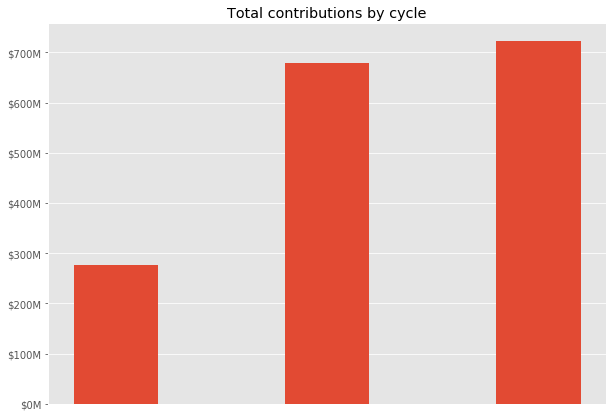

In [13]:
# https://scentellegher.github.io/programming/2017/05/24/pandas-bar-plot-with-formatted-dates.html
# contribs_by_year.set_index('coverage_through_date',inplace=True)

fig, ax = plt.subplots(figsize=(10,7))

ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# https://matplotlib.org/examples/pylab_examples/custom_ticker1.html
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: '$%1.fM' % (x*1e-6)))

ax.bar(contribs_by_cycle.index, contribs_by_cycle['col_a_total_contributions'], width=0.8)

ax.set_title('Total contributions by cycle')

### How many Democratic campaigns use ActBlue?

In [14]:
actblue_transfers = read_or_save(
    'actblue_transfers',
    lambda: pd.read_sql("""
    SELECT fec_committees.name,
           totals.*
    FROM
      (SELECT beneficiary_committee_fec_id,
              count(*),
              sum(contribution_amount)
       FROM actblue_contribs
       GROUP BY beneficiary_committee_fec_id) AS totals
    LEFT JOIN fec_committees ON beneficiary_committee_fec_id = fec_committees.id
    """, con=conn)
)
actblue_transfers.sort_values(by=['sum'], ascending=False)

,name,beneficiary_committee_fec_id,count,sum
0,DCCC,C00000935,11098194,"229,248,294.55"
1458,BERNIE 2016,C00577130,7674980,"198,901,495.65"
26,DSCC,C00042366,3342739,"93,547,170.82"
3552,None,None,15942899,"69,812,402.75"
1400,END CITIZENS UNITED,C00573261,3511313,"47,136,155.69"
2078,JON OSSOFF FOR CONGRESS,C00630426,1430332,"27,468,759.69"
2463,DOUG JONES FOR SENATE COMMITTEE,C00640623,756705,"21,896,543.77"
1501,PROGRESSIVE TURNOUT PROJECT,C00580068,1351062,"18,339,523.18"
666,BETO FOR TEXAS,C00501197,520590,"17,477,118.07"
11,DNC SERVICES CORP./DEM. NAT'L COMMITTEE,C00010603,650229,"14,310,036.91"


In [15]:
actblue_proportion = read_or_save(
    'actblue_proportion',
    lambda: pd.read_sql("""
    SELECT actblue,
           count(*)
    FROM
      (SELECT cand_id,
              cand_pcc,
              CASE
                  WHEN COUNT IS NOT NULL THEN TRUE
                  ELSE FALSE
              END AS actblue
       FROM (SELECT DISTINCT ON (cand_id,
                               cand_pcc) *
           FROM fec_candidates
           WHERE cand_election_yr = '2018'
             AND cand_pcc IS NOT NULL
             AND cand_pty_affiliation IN ('DFL',
                                      'DEM')
           ORDER BY cand_id,
                    cand_pcc) AS cands
       LEFT JOIN
         (SELECT fec_committees.name,
                 totals.*
          FROM
            (SELECT beneficiary_committee_fec_id,
                    count(*) AS COUNT,
                    sum(contribution_amount)
             FROM actblue_contribs
             WHERE extract(YEAR
                                FROM contribution_date) >= 2017
             GROUP BY beneficiary_committee_fec_id) AS totals
          LEFT JOIN fec_committees ON beneficiary_committee_fec_id = fec_committees.id) AS actblue_committees ON cand_pcc = beneficiary_committee_fec_id) AS actblue_candidates
    GROUP BY actblue
    """, con=conn)
)

actblue_proportion

,actblue,count
0,False,233
1,True,1297


In [16]:
def calc_actblue_proportion_amount(cycle):
    return read_or_save(
        'actblue_proportion_amount_' + str(cycle)[2:],
        lambda: pd.read_sql("""
        SELECT cand_pcc,
               array_agg(coverage_from_date) AS from_dates,
               array_agg(coverage_through_date) AS through_dates,
               sum(col_a_total_individual_contributions) AS committee_total,
               sum(actblue_total) AS actblue_total
        FROM
          (SELECT candidate_totals.cand_pcc,
                  coverage_from_date,
                  coverage_through_date,
                  col_a_total_individual_contributions,
                  sum(contribution_amount) AS actblue_total
           FROM
             (SELECT cand_id,
                     cand_pcc,
                     coverage_from_date,
                     coverage_through_date,
                     col_a_total_individual_contributions
              FROM
                (SELECT DISTINCT ON (cand_id,
                                     cand_pcc) *
                 FROM fec_candidates
                 WHERE cand_election_yr = '" + cycle + "'
                   AND cand_pty_affiliation IN ('DFL',
                                                'DEM')
                   AND cand_pcc IS NOT NULL
                 ORDER BY cand_id,
                          cand_pcc) AS cands
              JOIN fec_campaign_summaries ON cand_pcc = filer_committee_id_number
              JOIN fec_amended_filings USING (filing_id)
              WHERE extract(YEAR
                            FROM coverage_through_date) >= " + (cycle-1)  + "
                AND coverage_through_date <= '" + cycle + "-06-30'::date
              UNION SELECT cand_id,
                           cand_pcc,
                           coverage_from_date,
                           coverage_through_date,
                           col_a_total_individual_contributions
              FROM
                (SELECT DISTINCT ON (cand_id,
                                     cand_pcc) *
                 FROM fec_candidates
                 WHERE cand_election_yr = '" + cycle + "'
                   AND cand_pty_affiliation IN ('DFL',
                                                'DEM')
                   AND cand_pcc IS NOT NULL
                 ORDER BY cand_id,
                          cand_pcc) AS cands
              JOIN
                (SELECT DISTINCT ON (filer_committee_id_number,
                                     coverage_from_date,
                                     coverage_through_date) filing_id,
                                    filer_committee_id_number,
                                    col_a_total_individual_contributions,
                                    coverage_from_date,
                                    coverage_through_date
                 FROM fec_paper_campaign_summaries
                 WHERE col_a_total_individual_contributions IS NOT NULL
                 ORDER BY filer_committee_id_number,
                          coverage_through_date,
                          coverage_from_date,
                          filing_id DESC) AS paper_totals ON cand_pcc = filer_committee_id_number
              WHERE extract(YEAR
                            FROM coverage_through_date) >= " + (cycle-1)  + "
                AND coverage_through_date <= '" + cycle + "-06-30'::date) AS candidate_totals
           LEFT JOIN actblue_contribs ON extract(YEAR
                                                 FROM coverage_through_date) >= " + cycle + "
           AND coverage_through_date <= '" + cycle + "-06-30'::date
           AND actblue_contribs.cand_pcc = candidate_totals.cand_pcc
           AND coverage_from_date <= contribution_date
           AND coverage_through_date >= contribution_date
           GROUP BY candidate_totals.cand_pcc,
                    col_a_total_individual_contributions,
                    coverage_from_date,
                    coverage_through_date) AS totals
        GROUP BY cand_pcc
        """, con=conn)
    )

actblue_proportion_amount = calc_actblue_proportion_amount(2018)

actblue_proportion_amount

,cand_pcc,from_dates,through_dates,committee_total,actblue_total
0,C00140715,"[2017-04-01, 2018-01-01, 2017-01-01, 2017-10-0...","[2017-06-30, 2018-03-31, 2017-03-31, 2017-12-3...","833,046.34","6,566.66"
1,C00154625,"[2018-04-19, 2017-04-01, 2017-10-01, 2018-01-0...","[2018-06-30, 2017-06-30, 2017-12-31, 2018-03-3...","130,641.98","15,336.74"
2,C00156612,"[2017-07-01, 2018-04-01, 2017-10-01, 2018-01-0...","[2017-09-30, 2018-06-30, 2017-12-31, 2018-03-3...","14,537.54","5,412.54"
3,C00166504,"[2017-01-01, 2017-04-01, 2018-04-19, 2018-01-0...","[2017-03-31, 2017-06-30, 2018-06-30, 2018-03-3...","307,848.35","17,901.00"
4,C00167585,"[2018-05-17, 2017-10-01, 2017-01-01, 2017-04-0...","[2018-06-30, 2017-12-31, 2017-03-31, 2017-06-3...","438,618.26","188,207.51"
5,C00172619,"[2017-04-01, 2017-10-01, 2018-04-01, 2017-07-0...","[2017-06-30, 2017-12-31, 2018-06-30, 2017-09-3...","31,768.35","6,133.97"
6,C00195628,"[2018-01-01, 2018-04-01, 2017-01-01, 2017-07-0...","[2018-03-31, 2018-04-18, 2017-03-31, 2017-09-3...","273,330.00",446.80
7,C00202416,"[2017-04-01, 2017-10-01, 2018-01-01, 2017-01-0...","[2017-06-30, 2017-12-31, 2018-03-31, 2017-03-3...","2,255,642.66","1,552,231.91"
8,C00213512,"[2018-01-01, 2018-05-17, 2017-07-01, 2017-10-0...","[2018-03-31, 2018-06-30, 2017-09-30, 2017-12-3...","2,176,410.60","3,601,026.08"
9,C00213611,"[2017-04-01, 2017-01-01, 2017-07-01, 2018-01-0...","[2017-06-30, 2017-03-31, 2017-09-30, 2018-03-3...","271,648.26","133,061.26"


In [17]:
actblue_proportion_amount['actblue_total'].sum()/actblue_proportion_amount['committee_total'].sum()

0.534432257204556

In [18]:
actblue_proportion_amount['actblue_total'].sum()

340399348.67

In [19]:
actblue_proportion_amount.to_csv('data/actblue_proportion.csv')

In [20]:
actblue_proportion_amount_14 = calc_actblue_proportion_amount(2014)

actblue_proportion_amount_14['actblue_total'].sum()/actblue_proportion_amount_14['committee_total'].sum()

0.08830272408099248

In [21]:
actblue_proportion_amount_14

,cand_pcc,from_dates,through_dates,committee_total,actblue_total
0,C00002600,"[2013-07-01, 2013-04-01, 2014-04-01, 2013-10-0...","[2013-09-30, 2013-06-30, 2014-06-30, 2013-12-3...","58,335.00",100.00
1,C00013128,"[2013-10-01, 2014-01-01, 2014-04-01, 2013-01-0...","[2013-12-31, 2014-03-31, 2014-06-30, 2013-03-3...","466,245.00",209.00
2,C00026757,"[2014-04-01, 2013-01-01, 2013-10-01, 2013-07-0...","[2014-06-30, 2013-03-31, 2013-12-31, 2013-09-3...","191,410.02",110.00
3,C00081356,"[2013-07-01, 2013-01-01, 2013-04-01, 2013-10-0...","[2013-09-30, 2013-03-31, 2013-06-30, 2013-12-3...","581,162.61","16,241.77"
4,C00088484,[2013-01-01],[2013-03-31],500.00,nan
5,C00140715,"[2013-10-01, 2013-01-01, 2013-04-01, 2014-04-0...","[2013-12-31, 2013-03-31, 2013-06-30, 2014-06-0...","969,131.00",nan
6,C00148999,"[2013-07-01, 2013-10-01, 2013-04-01, 2013-01-0...","[2013-09-30, 2013-12-31, 2013-06-30, 2013-03-3...","4,047,069.78","34,461.96"
7,C00154625,"[2014-04-01, 2013-04-01, 2013-07-01, 2013-01-0...","[2014-04-16, 2013-06-30, 2013-09-30, 2013-03-3...","157,765.46","3,008.00"
8,C00156612,"[2014-04-01, 2013-01-01, 2014-01-01, 2013-10-0...","[2014-06-30, 2013-03-31, 2014-03-31, 2013-12-3...","264,830.36",300.00
9,C00165241,"[2013-07-01, 2014-01-01, 2013-04-01, 2013-10-0...","[2013-09-30, 2014-03-31, 2013-06-30, 2013-12-3...",0.00,nan


In [22]:
actblue_proportion_amount_14['actblue_total'].sum()

28939170.05

### Are Republican groups reporting any small donor data that we could analyze in a valid way, or is that just impossible?

In [23]:
transfer_committees = read_or_save(
    'transfer_committees',
    lambda: pd.read_sql("""
    SELECT filer_committee_id_number,
           fec_committees.name,
           count,
           sum
    FROM
        (SELECT filer_committee_id_number,
               count(*) AS count,
               sum(expenditure_amount) as sum
        FROM fec_expenditures
        JOIN fec_amended_filings using (filing_id)
        WHERE 
        -- filer_committee_id_number != '""" + committee_id + """' AND 
         extract(YEAR
                      FROM expenditure _date) >= 2017
          AND beneficiary_committee_fec_id IS NOT NULL
          AND form_type = 'SB23'
        GROUP BY filer_committee_id_number
        ORDER BY COUNT DESC
        LIMIT 10) as counts
    LEFT JOIN fec_committees
    ON fec_committees.id = filer_committee_id_number
    """, con=conn)
)

transfer_committees

,filer_committee_id_number,name,count,sum
0,C00401224,ACTBLUE,24728794,"689,493,693.07"
1,C00632133,SWING LEFT,1181420,"3,152,628.51"
2,C00341396,MOVEON.ORG POLITICAL ACTION,54605,"1,918,649.46"
3,C00252940,LEAGUE OF CONSERVATION VOTERS ACTION FUND,15418,"2,636,712.18"
4,C00432260,CLUB FOR GROWTH PAC,12542,"3,587,125.87"
5,C00608489,GREAT AMERICA PAC,11463,"132,394.46"
6,C00441949,JSTREETPAC,6750,"2,937,913.21"
7,C00484535,VOTESANE PAC,5486,"3,076,859.16"
8,C00544767,THE COMMITTEE TO DEFEND THE PRESIDENT,5422,"121,234.46"
9,C00552851,HOUSE FREEDOM FUND,4280,"3,660,084.00"


### Unitemized contributions versus itemized for this point in the cycle for both the 2018 and 2014 cycle, and break it down by Republican versus Democrat?

In [24]:
candidate_unitemized_by_party_14 = read_or_save(
    'candidate_unitemized_by_party_14',
    lambda: pd.read_sql("""
    SELECT CASE
               WHEN cand_pty_affiliation = 'DEM' THEN 'Democrat'
               WHEN cand_pty_affiliation = 'DFL' THEN 'Democrat'
               WHEN cand_pty_affiliation = 'REP' THEN 'Republican'
               ELSE 'other'
           END AS party,
           -- cand_office,
           count(DISTINCT cand_id),
           sum(col_a_individual_contributions_itemized) AS itemized,
           sum(col_a_individual_contributions_unitemized) AS unitemized,
           sum(col_a_total_individual_contributions) AS indivs
    FROM
      (SELECT DISTINCT ON (cand_id,
                           cand_pcc) *
       FROM fec_candidates
       WHERE
       cand_election_yr = '2014' AND
     cand_pcc IS NOT NULL
       ORDER BY cand_id,
                cand_pcc) AS cands
    JOIN
      (SELECT filing_id,
              filer_committee_id_number,
              col_a_individual_contributions_itemized,
              col_a_individual_contributions_unitemized,
              col_a_total_individual_contributions,
              col_a_total_receipts,
              col_a_total_disbursements,
              coverage_from_date,
              coverage_through_date
       FROM fec_campaign_summaries
       JOIN fec_amended_filings USING (filing_id)
       UNION SELECT DISTINCT ON (filer_committee_id_number,
                                 coverage_from_date,
                                 coverage_through_date) filing_id,
                                filer_committee_id_number,
                                col_a_individual_contributions_itemized,
                                col_a_individual_contributions_unitemized,
                                col_a_total_individual_contributions,
                                col_a_total_receipts,
                                col_a_total_disbursements,
                                coverage_from_date,
                                coverage_through_date
       FROM fec_paper_campaign_summaries
       WHERE col_a_total_individual_contributions IS NOT NULL
       ORDER BY filer_committee_id_number,
                coverage_through_date,
                coverage_from_date,
                filing_id DESC) AS summaries ON cand_pcc = filer_committee_id_number
    WHERE extract(YEAR
                  FROM coverage_through_date) >= 2013
      AND coverage_through_date <= '2014-06-30'::date
      -- AND (col_a_total_receipts > 0
    --       OR col_a_total_disbursements > 0)
    GROUP BY -- cand_office,
             party
    ORDER BY indivs DESC
    """, con=conn)
)
candidate_unitemized_by_party_14

,party,count,itemized,unitemized,indivs
0,Republican,849,"319,873,352.63","53,296,471.38","373,167,891.91"
1,Democrat,640,"283,647,027.55","62,509,524.09","346,161,686.64"
2,other,85,"2,176,185.10","675,662.02","2,854,043.12"


In [25]:
candidate_unitemized_by_party_18 = read_or_save(
    'candidate_unitemized_by_party_18',
    lambda: pd.read_sql("""
    SELECT CASE
               WHEN cand_pty_affiliation = 'DEM' THEN 'Democrat'
               WHEN cand_pty_affiliation = 'DFL' THEN 'Democrat'
               WHEN cand_pty_affiliation = 'REP' THEN 'Republican'
               ELSE 'other'
           END AS party,
           -- cand_office,
           count(DISTINCT cand_id),
           sum(col_a_individual_contributions_itemized) AS itemized,
           sum(col_a_individual_contributions_unitemized) AS unitemized,
           sum(col_a_total_individual_contributions) AS indivs
    FROM
      (SELECT DISTINCT ON (cand_id,
                           cand_pcc) *
       FROM fec_candidates
       WHERE
       cand_election_yr = '2018' AND
     cand_pcc IS NOT NULL
       ORDER BY cand_id,
                cand_pcc) AS cands
    JOIN
      (SELECT filing_id,
              filer_committee_id_number,
              col_a_individual_contributions_itemized,
              col_a_individual_contributions_unitemized,
              col_a_total_individual_contributions,
              col_a_total_receipts,
              col_a_total_disbursements,
              coverage_from_date,
              coverage_through_date
       FROM fec_campaign_summaries
       JOIN fec_amended_filings USING (filing_id)
       UNION SELECT DISTINCT ON (filer_committee_id_number,
                                 coverage_from_date,
                                 coverage_through_date) filing_id,
                                filer_committee_id_number,
                                col_a_individual_contributions_itemized,
                                col_a_individual_contributions_unitemized,
                                col_a_total_individual_contributions,
                                col_a_total_receipts,
                                col_a_total_disbursements,
                                coverage_from_date,
                                coverage_through_date
       FROM fec_paper_campaign_summaries
       WHERE col_a_total_individual_contributions IS NOT NULL
       ORDER BY filer_committee_id_number,
                coverage_through_date,
                coverage_from_date,
                filing_id DESC) AS summaries ON cand_pcc = filer_committee_id_number
    WHERE extract(YEAR
                  FROM coverage_through_date) >= 2017
      AND coverage_through_date <= '2018-06-30'::date
      -- AND (col_a_total_receipts > 0
    --       OR col_a_total_disbursements > 0)
    GROUP BY -- cand_office,
             party
    ORDER BY indivs DESC
    """, con=conn)
)
candidate_unitemized_by_party_18


,party,count,itemized,unitemized,indivs
0,Democrat,1287,"493,920,027.53","179,692,020.49","675,492,335.17"
1,Republican,929,"301,799,698.88","59,671,848.62","361,227,378.50"
2,other,138,"7,469,548.68","7,097,598.75","14,619,006.43"


### How candidates in the DCCC’s Red to Blue program do via ActBlue.

In [26]:
redtoblue = ['C00572859',
            'C00575209',
            'C00578476',
            'C00633982',
            'C00637074',
            'C00637363',
            'C00637371',
            'C00637868',
            'C00640003',
            'C00640045',
            'C00640714',
            'C00641381',
            'C00646745',
            'C00646752',
            'C00647537',
            'C00648220',
            'C00648493',
            'C00648725',
            'C00648956',
            'C00649327',
            'C00649483',
            'C00649558',
            'C00649798',
            'C00650150',
            'C00650648',
            'C00651042',
            'C00652065',
            'C00652248',
            'C00652297',
            'C00652594',
            'C00652719',
            'C00653121',
            'C00654400',
            'C00656686',
            'C00658633',
            'C00661868',
            'C00662577',
            'C00664375',
            'C00666149',
            'C00667519',
            'C00668228',
            'C00671156',
            'C00675538',
            'C00639146',
            'C00634212',
            'C00636571',
            'C00634253',
            'C00646844',
            'C00653816',
            'C00667097',
            'C00658567',
            'C00649913',
            'C00638023',
            'C00647164',
            'C00639989']

redtoblue_actblue = actblue_proportion_amount[actblue_proportion_amount['cand_pcc'].isin(redtoblue)]

redtoblue_actblue

,cand_pcc,from_dates,through_dates,committee_total,actblue_total
221,C00572859,"[2018-01-01, 2017-10-01, 2017-01-01, 2017-07-0...","[2018-03-31, 2017-12-31, 2017-03-31, 2017-09-3...","1,026,390.47","675,571.51"
227,C00575209,"[2018-04-01, 2017-10-01, 2017-07-01, 2017-04-0...","[2018-06-30, 2017-12-31, 2017-09-30, 2017-06-3...","1,425,243.95","774,510.06"
335,C00633982,"[2018-04-01, 2018-05-17, 2017-10-01, 2018-01-0...","[2018-05-16, 2018-06-30, 2017-12-31, 2018-03-3...","1,309,809.33","886,406.23"
343,C00634212,"[2017-10-01, 2017-04-01, 2018-05-17, 2018-01-0...","[2017-12-31, 2017-06-30, 2018-06-30, 2018-03-3...","2,215,921.16","934,442.68"
344,C00634253,"[2018-04-01, 2017-10-01, 2018-05-17, 2018-01-0...","[2018-05-16, 2017-12-31, 2018-06-30, 2018-03-3...","2,492,909.55","1,985,970.76"
386,C00636571,"[2017-07-01, 2017-10-01, 2017-03-31, 2018-05-1...","[2017-09-30, 2017-12-31, 2017-06-30, 2018-06-3...","1,866,741.32","1,396,861.47"
403,C00637074,"[2017-10-01, 2017-07-01, 2017-04-01, 2018-05-1...","[2017-12-31, 2017-09-30, 2017-06-30, 2018-06-3...","1,432,268.16","753,149.96"
415,C00637363,"[2017-07-01, 2017-10-01, 2018-01-01, 2017-04-0...","[2017-09-30, 2017-12-31, 2018-03-31, 2017-06-3...","1,580,297.24","418,364.87"
416,C00637371,"[2017-07-01, 2018-04-01, 2017-03-21, 2017-10-0...","[2017-09-30, 2018-04-25, 2017-06-30, 2017-12-3...","2,164,825.06","949,314.22"
429,C00637868,"[2018-01-01, 2018-02-15, 2017-04-23, 2018-04-0...","[2018-02-14, 2018-03-31, 2017-06-30, 2018-05-0...","1,716,020.60","1,197,246.90"


In [27]:
redtoblue_actblue['actblue_total'].sum()/redtoblue_actblue['committee_total'].sum()

0.5420099373195313

### Whether candidates who pledge not to take corporate PAC money are getting more contributions than other candidates.

In [28]:
endcu = ['C00413914',
        'C00420760',
        'C00500843',
        'C00516047',
        'C00505552',
        'C00434563',
        'C00326801',
        'C00431353',
        'C00431304',
        'C00412304',
        'C00264697',
        'C00431056',
        'C00410803',
        'C00344051',
        'C00344473',
        'C00238865',
        'C00460261',
        'C00469163',
        'C00462861',
        'C00476564',
        'C00345546',
        'C00459099',
        'C00374058',
        'C00513077',
        'C00502294',
        'C00510461',
        'C00502575',
        'C00498667',
        'C00503110',
        'C00590489',
        'C00494856',
        'C00497396',
        'C00495952',
        'C00498568',
        'C00140715',
        'C00499947',
        'C00516666',
        'C00503052',
        'C00635722',
        'C00273169',
        'C00512426',
        'C00500421',
        'C00497933',
        'C00514893',
        'C00502179',
        'C00558627',
        'C00503185',
        'C00557652',
        'C00541888',
        'C00547240',
        'C00401190',
        'C00558320',
        'C00555813',
        'C00422360',
        'C00576041',
        'C00577353',
        'C00620443',
        'C00590067',
        'C00575092',
        'C00419630',
        'C00415182',
        'C00574640',
        'C00310318',
        'C00575126',
        'C00572859',
        'C00573949',
        'C00592659',
        'C00610964',
        'C00605592',
        'C00668574',
        'C00671156',
        'C00651042',
        'C00649897',
        'C00213512',
        'C00331769',
        'C00648956',
        'C00638510',
        'C00650648',
        'C00633982',
        'C00635888',
        'C00637363',
        'C00649798',
        'C00652594',
        'C00652065',
        'C00649376',
        'C00637074',
        'C00646844',
        'C00648493',
        'C00327023',
        'C00649558',
        'C00649483',
        'C00652719',
        'C00657635',
        'C00651331',
        'C00653121',
        'C00651158',
        'C00646745',
        'C00639427',
        'C00653816',
        'C00636324',
        'C00649327',
        'C00640714',
        'C00650440',
        'C00641381',
        'C00662577',
        'C00639310',
        'C00640003',
        'C00639054',
        'C00666149',
        'C00655613',
        'C00338954',
        'C00652248',
        'C00236513',
        'C00450049',
        'C00648725',
        'C00667519',
        'C00646752',
        'C00665471',
        'C00446906',
        'C00637371',
        'C00667097',
        'C00650507',
        'C00640045',
        'C00653923',
        'C00652297',
        'C00660555',
        'C00649350',
        'C00637868',
        'C00658633',
        'C00664375',
        'C00649913',
        'C00654400',
        'C00639989',
        'C00508804',
        'C00654822',
        'C00606939',
        'C00501197',
        'C00663146']

endcu_actblue = actblue_proportion_amount[actblue_proportion_amount['cand_pcc'].isin(endcu)]

endcu_actblue

,cand_pcc,from_dates,through_dates,committee_total,actblue_total
0,C00140715,"[2017-04-01, 2018-01-01, 2017-01-01, 2017-10-0...","[2017-06-30, 2018-03-31, 2017-03-31, 2017-12-3...","833,046.34","6,566.66"
8,C00213512,"[2018-01-01, 2018-05-17, 2017-07-01, 2017-10-0...","[2018-03-31, 2018-06-30, 2017-09-30, 2017-12-3...","2,176,410.60","3,601,026.08"
14,C00236513,"[2017-07-01, 2017-01-01, 2017-04-01, 2018-01-0...","[2017-09-30, 2017-03-31, 2017-06-30, 2018-03-3...","966,555.90","1,406.90"
15,C00238865,"[2018-01-01, 2017-07-01, 2017-10-01, 2018-04-2...","[2018-03-31, 2017-09-30, 2017-12-31, 2018-06-3...","504,355.16","174,758.00"
29,C00264697,"[2017-07-01, 2018-01-01, 2018-04-19, 2017-10-0...","[2017-09-30, 2018-03-31, 2018-06-30, 2017-12-3...","13,269,011.53","5,317,997.75"
33,C00273169,"[2017-07-01, 2018-04-01, 2017-04-01, 2018-01-0...","[2017-09-30, 2018-06-06, 2017-06-30, 2018-03-3...","1,053,471.94","92,399.67"
44,C00310318,"[2017-10-01, 2018-04-01, 2017-07-01, 2017-04-0...","[2017-12-31, 2018-06-06, 2017-09-30, 2017-06-3...","335,492.05","193,475.79"
49,C00326801,"[2017-10-01, 2017-07-01, 2018-04-01, 2017-04-0...","[2017-12-31, 2017-09-30, 2018-06-30, 2017-06-3...","15,814,953.10","5,819,781.38"
50,C00327023,"[2017-01-01, 2017-04-01, 2018-01-01, 2017-07-0...","[2017-03-31, 2017-06-30, 2018-02-28, 2017-09-3...","969,358.26","104,946.83"
52,C00331769,"[2017-01-01, 2018-05-17, 2017-07-01, 2018-04-0...","[2017-03-31, 2018-06-30, 2017-09-30, 2018-05-1...","1,022,157.38","640,117.48"


In [29]:
endcu_actblue.describe()

,committee_total,actblue_total
count,136.00,135.00
mean,"2,250,212.21","1,261,477.05"
std,"3,729,555.95","3,062,892.63"
min,"81,742.03",195.22
25%,"659,742.90","153,437.08"
50%,"1,084,017.64","431,035.36"
75%,"1,623,309.22","931,078.05"
max,"23,522,659.90","28,896,553.74"


In [30]:
actblue_proportion_amount[~actblue_proportion_amount['cand_pcc'].isin(endcu)].describe()

,committee_total,actblue_total
count,"1,143.00","1,025.00"
mean,"289,507.89","165,951.17"
std,"964,238.41","795,132.71"
min,0.00,1.00
25%,"11,329.34","3,793.93"
50%,"63,413.21","22,164.06"
75%,"264,786.48","113,680.46"
max,"23,524,504.95","21,829,737.17"


In [31]:
endcu_actblue['actblue_total'].sum()/endcu_actblue['committee_total'].sum()

0.5564815084229917

### Where do the donors giving through ActBlue come from geographically? Any striking or interesting patterns, or zip codes that typically don’t contribute?

In [32]:
actblue_states = read_or_save(
    'actblue_states',
    lambda: pd.read_sql("""
    SELECT contributor_state,
           count(*),
           sum(contribution_amount)
    FROM actblue_contribs
    GROUP BY contributor_state
    """, con=conn)
)
actblue_states.sort_values(by=['sum'], ascending=False)

,contributor_state,count,sum
17,CA,13929247,"335,612,874.58"
64,NY,6454081,"186,707,526.03"
40,MA,3187355,"87,279,278.03"
88,TX,3732662,"81,421,346.63"
24,FL,3660635,"76,552,531.25"
34,IL,2820449,"64,434,206.45"
95,WA,3152336,"59,701,863.43"
91,VA,1903070,"53,151,404.77"
70,PA,2476800,"51,711,270.50"
42,MD,1692652,"46,873,506.68"


In [33]:
actblue_states.to_csv('data/states.csv')

In [34]:
clinton_votes = pd.read_csv('data/clintonvotes.csv')

clinton_votes

votes_vs_contribs = actblue_states.merge(clinton_votes, left_on='contributor_state', right_on='postal', how='inner')

votes_vs_contribs['dollars_per'] = votes_vs_contribs['sum']/votes_vs_contribs['votes']

votes_vs_contribs.sort_values(by=['dollars_per'], ascending=False)

,contributor_state,count,sum,state,postal,votes,dollars_per
7,DC,549492,"35,476,385.41",District of Columbia,DC,282830,125.43
46,VT,551998,"10,521,946.09",Vermont,VT,178573,58.92
26,MT,363475,"8,862,784.24",Montana,MT,177709,49.87
19,MA,3187355,"87,279,278.03",Massachusetts,MA,1995196,43.74
32,NM,902815,"16,747,585.64",New Mexico,NM,385234,43.47
34,NY,6454081,"186,707,526.03",New York,NY,4556142,40.98
0,AK,227983,"4,492,464.77",Alaska,AK,116454,38.58
4,CA,13929247,"335,612,874.58",California,CA,8753792,38.34
30,NH,548011,"12,749,122.15",New Hampshire,NH,348526,36.58
50,WY,86714,"2,033,999.29",Wyoming,WY,55973,36.34


In [35]:
votes_vs_contribs['contribs_per'] = votes_vs_contribs['count']/votes_vs_contribs['votes']

votes_vs_contribs.sort_values(by=['contribs_per'], ascending=False)

,contributor_state,count,sum,state,postal,votes,dollars_per,contribs_per
46,VT,551998,"10,521,946.09",Vermont,VT,178573,58.92,3.09
32,NM,902815,"16,747,585.64",New Mexico,NM,385234,43.47,2.34
37,OR,2187875,"33,864,200.42",Oregon,OR,1002106,33.79,2.18
26,MT,363475,"8,862,784.24",Montana,MT,177709,49.87,2.05
0,AK,227983,"4,492,464.77",Alaska,AK,116454,38.58,1.96
7,DC,549492,"35,476,385.41",District of Columbia,DC,282830,125.43,1.94
47,WA,3152336,"59,701,863.43",Washington,WA,1742718,34.26,1.81
19,MA,3187355,"87,279,278.03",Massachusetts,MA,1995196,43.74,1.60
4,CA,13929247,"335,612,874.58",California,CA,8753792,38.34,1.59
30,NH,548011,"12,749,122.15",New Hampshire,NH,348526,36.58,1.57


In [36]:
actblue_in_state = read_or_save(
    'actblue_in_state',
    lambda: pd.read_sql("""
    SELECT CASE
               WHEN coalesce(beneficiary_candidate_state,cand_office_st) = contributor_state THEN TRUE
               ELSE FALSE
           END AS in_state,
           sum(contribution_amount),
           count(*)
    FROM actblue_contribs
    WHERE beneficiary_candidate_state IS NOT NULL
      OR cand_office_st IS NOT NULL
    GROUP BY in_state
    """, con=conn)
)
actblue_in_state

,in_state,sum,count
0,False,"620,773,641.96",23794614
1,True,"330,828,769.69",5974546


In [37]:
actblue_freq = read_or_save(
    'actblue_freq',
    lambda: pd.read_sql("""
    SELECT COUNT,
           count(*) AS count_of_count
    FROM
      (SELECT contributor_first_name,
              contributor_last_name,
              left(contributor_zip_code,5),
              count(*) AS COUNT
       FROM actblue_contribs
       GROUP BY contributor_first_name,
                contributor_last_name,
                left(contributor_zip_code,5)) AS donors
    GROUP BY COUNT
    """, con=conn)
)
actblue_freq

,count,count_of_count
0,1798,1
1,1489,3
2,1269,1
3,652,21
4,273,160
5,51,5705
6,2574,1
7,951,3
8,1898,2
9,70,3081


In [38]:
actblue_addicts = read_or_save(
    'actblue_addicts',
    lambda: pd.read_sql("""
    SELECT contributor_first_name,
           contributor_last_name,
           array_agg(DISTINCT contributor_occupation),
           array_agg(DISTINCT contributor_employer),
           array_agg(DISTINCT contributor_street_1),
           array_agg(DISTINCT contributor_city),
           contributor_state,
           left(contributor_zip_code,5) AS contributor_zip_code,
           count(*) AS COUNT,
           sum(contribution_amount) AS total,
           sum(contribution_amount)/count(*) AS avg_per
    FROM actblue_contribs
    WHERE extract(YEAR
                  FROM contribution_date) > 2016
    GROUP BY contributor_first_name,
             contributor_last_name,
             contributor_state,
             left(contributor_zip_code,5)
    ORDER BY COUNT DESC
    LIMIT 100
    """, con=conn)
)
actblue_addicts

,contributor_first_name,contributor_last_name,array_agg,array_agg,array_agg,array_agg,contributor_state,contributor_zip_code,count,total,avg_per
0,SIBYLLE,BARLOW,[RETIRED],[RETIRED],[241 HOLDEN WOOD ROAD],[CONCORD],MA,01742,14716,"54,401.98",3.70
1,TERRY,WOLFE,[RETAIL],"[LOWES, LOWE'S]","[1199 E 3RD ST, 1199 EAST THIRD STREET]",[MORGANTOWN],WV,26508,9456,"26,794.07",2.83
2,JOHN,COMELLA,[NONE],[NONE],[1900 J F KENNEDY BLVD SUITE 1624],[PHILADELPHIA],PA,19103,9359,"26,981.09",2.88
3,RICHARD,GOLDSTEIN,"[NOT EMPLOYED, RETIRED]","[NOT EMPLOYED, RETIRED]","[375 SAGAPONACK RD, L O BOX752, P O 752, POB0X...","[SAFAPONACK, SAGAPONACK]",NY,11962,8402,"146,293.73",17.41
4,VICKI,FARRAR,[NOT EMPLOYED],[NOT EMPLOYED],[P O BOX 140375],[GARDEN CITY],ID,83714,7856,"34,069.16",4.34
5,ROXANNE,WARREN,"[ARCHITECT, ARCHITECTS]",[SELF],[523 WEST 112TH STREET 72],[NEW YORK],NY,10025,7776,"79,123.94",10.18
6,CAROLINE,MERRIAM,[FOUNDATION PRESIDENT],[RAMSAY MERRIAM FUND],[1316 30TH STREET NW],[WASHINGTON],DC,20007,7710,"112,502.66",14.59
7,WILLIAM,CHEEK,[RETIRED PROFESSOR],[NONE],[6209 ESTELLE ST],[SAN DIEGO],CA,92115,7270,"85,805.11",11.80
8,MARTHA,UTZ,[NOT EMPLOYED],[NOT EMPLOYED],[1118 ALLSTON CT],[SAN JOSE],CA,95120,6996,"24,811.81",3.55
9,LUCY,HARMON,[NOT EMPLOYED],[SELF],[13621SHANNON ST],[LINDALE],TX,75771,6712,"59,341.99",8.84


### Where do contributors give from?

Spreadsheet of the 1,307 candidate committees that got at least some money through ActBlue this cycle.

### Questions to answer
> - Is this fueling primary fights?
> - Where do the donors giving through ActBlue come from geographically? Any striking or interesting patterns, or zip codes that typically don’t contribute?
> - Where is the money going? Are people giving to local candidates or are they giving to candidates around the country? Which campaigns/candidates/groups have done the best job tapping into this network?
> - What’s the gender breakdown and how does it compare to the gender breakdown of itemized contributions? Is it different?
> - Are these new donors?
> - Can we tell if these are recurring contributions or one time contributions?
> - Do the majority of these donors give repeatedly or are they one and done? How does that compare to itemized contributions? How “sticky” is this?

In [39]:
%%bash
jupyter nbconvert analysis.ipynb

[NbConvertApp] Converting notebook analysis.ipynb to html
[NbConvertApp] Writing 525420 bytes to analysis.html
